# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [2]:
DATA_FOLDER = 'Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [43]:
# Write your answer here
import glob
import pandas as pd
import numpy as np

# We want all the csv files that are in guinea folder
filenames_guinea = glob.glob(DATA_FOLDER + "/ebola/guinea_data" + "/*.csv")

# We make a new DataFrame and an empty list
frame_guinea = pd.DataFrame()
list_g = []

# We read every csv in the folder, and add it on the list
for filename in filenames_guinea:
    dataframe = pd.read_csv(filename, index_col = None, header = 0)
    dataframe["Country"] = "Guinea"
    list_g.append(dataframe) 
# We concantenate the list in order to have one dataframe
frame_guinea = pd.concat(list_g)

# We do the same for Liberia and Sierra Leone
filenames_liberia = glob.glob(DATA_FOLDER + "/ebola/liberia_data" + "/*.csv")

frame_liberia = pd.DataFrame()
list_l = []
for filename in filenames_liberia:
    dataframe = pd.read_csv(filename, index_col = None, header = 0)
    list_l.append(dataframe)
    dataframe["Country"] = "Liberia"
frame_liberia = pd.concat(list_l)

filenames_sl = glob.glob(DATA_FOLDER + "/ebola/sl_data" + "/*.csv")

frame_sl = pd.DataFrame()
list_sl = []
for filename in filenames_sl:
    dataframe = pd.read_csv(filename, index_col = None, header = 0)
    dataframe["Country"] = "Sierra Leone"
    list_sl.append(dataframe)
frame_sl = pd.concat(list_sl)

#frames = [frame_guinea, frame_liberia, frame_sl]
#result = pd.concat(frames)

frame_guinea = frame_guinea.fillna(0)
frame_guinea['Date'] = pd.to_datetime(frame_guinea['Date'])
frame_guinea_newcases = frame_guinea[frame_guinea['Description'].isin(['New cases of suspects', 'New cases of probables', 'New cases of confirmed'])]
frame_guinea_deaths = frame_guinea[frame_guinea['Description'].isin(['New deaths registered'])]

frame_guinea_newcases_8 = frame_guinea_newcases[frame_guinea_newcases.Date.dt.month == 8]
frame_guinea_newcases_9 = frame_guinea_newcases[frame_guinea_newcases.Date.dt.month == 9]
frame_guinea_newcases_10 = frame_guinea_newcases[frame_guinea_newcases.Date.dt.month == 10]

frame_guinea_deaths_8 = frame_guinea_deaths[frame_guinea_deaths.Date.dt.month == 8]
frame_guinea_deaths_9 = frame_guinea_deaths[frame_guinea_deaths.Date.dt.month == 9]
frame_guinea_deaths_10 = frame_guinea_deaths[frame_guinea_deaths.Date.dt.month == 10]

frame_guinea_newcases_8 = frame_guinea_newcases_8.groupby(['Date']).sum()

frame_guinea_newcases_8




,Beyla,Boffa,Country,Coyah,Dabola,Dalaba,Description,Dinguiraye,Forecariah,Kerouane,Kindia,Kissidougou,Kouroussa,Lola,Nzerekore,Siguiri,Telimele
Date,,,,,,,,,,,,,,,,,
2014-08-04,0,0.0,GuineaGuineaGuinea,0,0,0,New cases of suspectsNew cases of probablesNew...,0,0,0,0,0,0.0,0,0.0,0.0,0
2014-08-26,0,0.0,GuineaGuineaGuinea,0,0,0,New cases of suspectsNew cases of probablesNew...,0,0,0,0,0,0.0,0,0.0,0.0,0
2014-08-27,0,0.0,GuineaGuineaGuinea,0,000,0,New cases of suspectsNew cases of probablesNew...,000,0,0,0,000,0.0,0,1.0,0.0,000
2014-08-30,0,0.0,GuineaGuineaGuinea,0,0,0,New cases of suspectsNew cases of probablesNew...,0,0,0,0,0,0.0,0,0.0,0.0,0
2014-08-31,0,0.0,GuineaGuineaGuinea,0,0,0,New cases of suspectsNew cases of probablesNew...,0,0,0,0,0,0.0,0,0.0,0.0,0


## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [59]:
# Write your answer here
import glob
import pandas as pd

# We want all the xls files that are in microbiome folder
frame_micro = pd.DataFrame()
list_ = []
for i in range(1, 10):
    i = str(i)
    data = pd.read_excel(DATA_FOLDER + "/microbiome/MID" + i + ".xls", sheetname = "Sheet 1", header = None)
    data['Origin'] = "MID" + i # this way we will know after from which file the data come
    list_.append(data)
frame_micro = pd.concat(list_)

# We read the 10th spreadsheet
frame_metadata = pd.read_excel(DATA_FOLDER + "/microbiome/metadata.xls", sheetname = "Sheet1")

# We make the two new columns we need for the dataframe and we copy the value that is in the column "origin",
# this way, we only have to replace the value by what is on the metadata dataframe
frame_micro['GROUP'] = frame_micro['Origin']
frame_micro['SAMPLE'] = frame_micro['Origin']

# Here we do several things at the same time. The idea is to replace in column 'GROUP' and 'SAMPLE' the value by the value that is given in 
# the metadata file. For example, we know that for row whose origin is MID1, the 'GROUP' column should be filled with "EXTRACTION CONTROL".
# So the idea is to search in the metadata file which term is going to replace the exisiting term. For that we search the row that contains for example
# MID1, and when we have the row, we just have to take the right column ('GROUP' or 'SAMPLE').
for i in range(1, 10):
    i = str(i)
    frame_micro['GROUP'] = frame_micro['GROUP'].replace(['MID' + i], frame_metadata.loc[frame_metadata['BARCODE'] == 'MID' + i]['GROUP'])
    frame_micro['SAMPLE'] = frame_micro['SAMPLE'].replace(['MID' + i], frame_metadata.loc[frame_metadata['BARCODE'] == 'MID' + i]['SAMPLE'])

# We delete the 'Origin' column as we don't need it anymore
frame_micro = frame_micro.drop('Origin', 1)    

# We replace all the Nan values in the dataframe by 'unknown'
frame_micro = frame_micro.fillna('unknown')

# We make a unique index for the data
ind = [i for i in range (len(frame_micro))]
frame_micro.reset_index(drop=True)
frame_micro.index = range(len(frame_micro.index))


array([   0,    1,    2, ..., 2393, 2394, 2395])

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [ ]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

<h2>Solution</h2>

<h5>1. Describe the type and the value range of each attribute. Indicate and transform the attributes that can be Categorical</h5>

<br>
<div>
<p>Here we will explain...</p>
</div>

<br>
<h5>2. Plot histograms for the travel class, embarkation port, sex and age attributes. For the latter one, use discrete decade intervals. </h5>

<br>
<div>
<p></p>
</div>

In [2]:
# read the data
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


titanic_data = pd.read_excel("Data/titanic.xls")


Travel class 



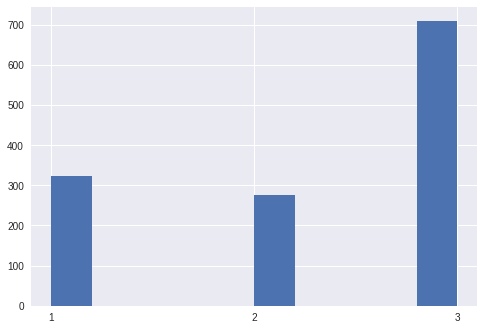


Embarkation port  



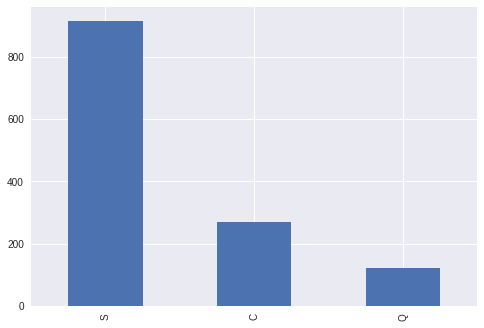


Sex  



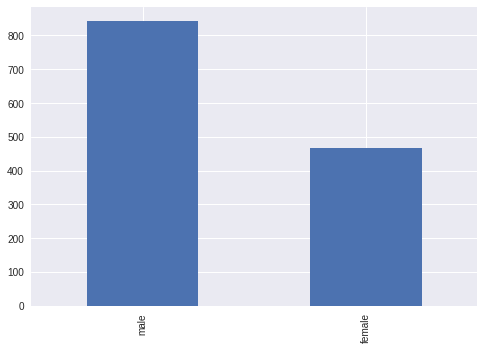


Age  



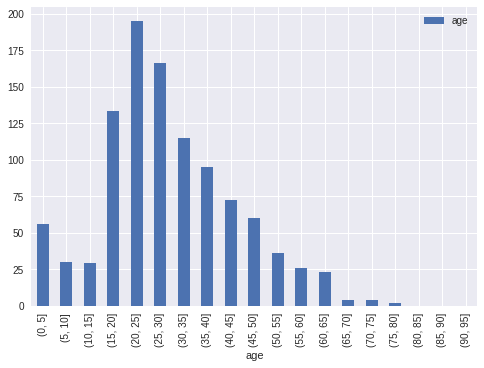

1307


In [17]:
from matplotlib.ticker import MaxNLocator

print("\nTravel class", "\n")
pl = titanic_data.pclass
pl.isnull().sum()
pl = titanic_data.pclass.hist(bins=10)
pl.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()


print("\nEmbarkation port ", "\n")
pl = titanic_data.embarked.value_counts().plot(kind='bar')
plt.show()

print("\nSex ", "\n")
titanic_data.sex.value_counts().plot(kind='bar')
plt.show()


print("\nAge ", "\n")

age_groups = titanic_data.groupby(pd.cut(titanic_data["age"], np.arange(0, 100, 5)))['age'].count()
null_age = titanic_data['age'].isnull().sum()

s = pd.DataFrame(age_groups)
#print (s.age.sum() + null_age)
#print (titanic_data.shape)
s.plot(kind='bar')
plt.show()


# two men are missing => isnull doesn't find this! => empty strings
num_s = len(titanic_data.query('embarked == \'S\''))
num_q = len(titanic_data.query('embarked == \'Q\''))
num_c = len(titanic_data.query('embarked == \'C\''))
print (num_s+num_q+num_c)

<h4> 3. Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.</h4>
<br>
<div>
<p>

There are some passingers that are listed in cabin names "F E..", "F G..". These are most probably input errors. We will just take these people as they are on both of the floors, since we don't know for sure. There is 7 people more than it really was on the ship, so we know there are 7 people more that we counted on two floors. We are of course aware of the fact that these people are counted on both floors because there is same posibility they were in one or another cabin. Of course, we could try to search if there is another person who is in one of two possible cabins, and then check if this cabin was for one or two people. But since we don't have information of how many people there were in specific cabin, we will just count these people as they were in both cabins.  
</p>
</div>


With people on unknown floors  

1316 > 1309
{'A': 22, 'B': 65, 'C': 94, 'D': 46, 'E': 44, 'F': 21, 'G': 9, 'T': 1, 'unknown': 1014}
9


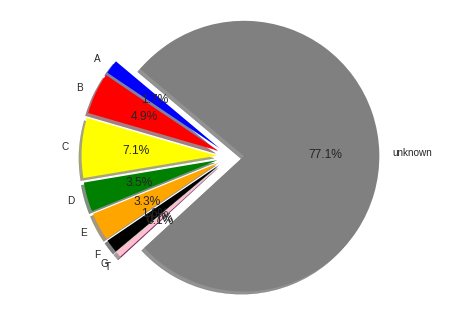


Only people on known floors 



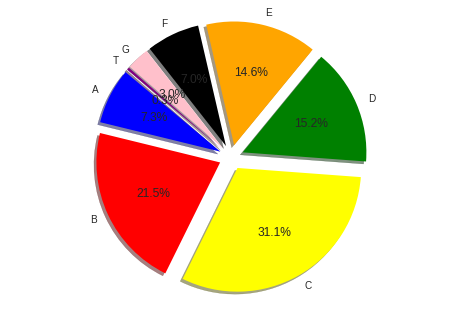

In [18]:
print("\nWith people on unknown floors ", "\n")

floors = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'unknown']
dic = {}
sum_people = 0
for i in floors:
    num = len(titanic_data[titanic_data.cabin.str.contains(i).fillna(False)])
    dic[i] = num
    sum_people += num

dic['unknown'] = (titanic_data.cabin.isnull().sum())
print ( sum_people + titanic_data.cabin.isnull().sum(), ">", len(titanic_data))

print (dic)
values = list(dic.values())
print (len(values))

colors = ['blue', 'red', 'yellow', 'green', 'orange', 'black', 'pink', 'purple', 'grey']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
labels = floors

plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

print("\nOnly people on known floors", "\n")
del dic['unknown']

values = list(dic.values())
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
labels = floors[0:8]

plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

<h4> 4. For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.</h4>
<br>
<div>
<p>

</p>
</div>


Percentage of survived and died - class  1 



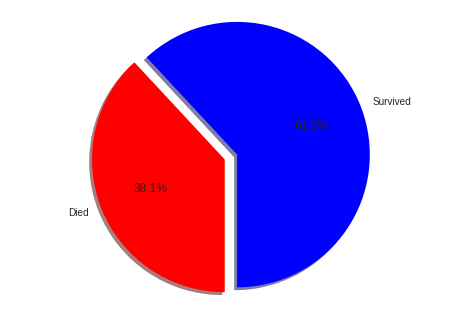


Percentage of survived and died - class  2 



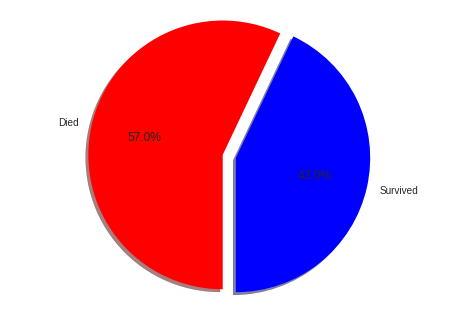


Percentage of survived and died - class  3 



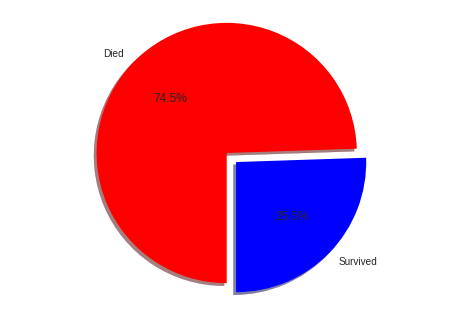

In [19]:
def plot_percentage_survivors(pclass, survivors_flag):
    print("\nPercentage of survived and died - class ", pclass, "\n")
    class_all_passengers = len(titanic_data.query("pclass == @pclass"))
    class_survivors = len(titanic_data.query("pclass == @pclass & survived==@survivors_flag"))
    colors = ['blue', 'red']
    explode = (0, 0.1)
    labels = ["Survived", "Died"]

    plt.pie([class_survivors, class_all_passengers-class_survivors], explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=270)
    plt.axis('equal')
    plt.show()


plot_percentage_survivors(1, 1)
plot_percentage_survivors(2, 1)
plot_percentage_survivors(3, 1)

<h4> 5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.</h4>

In [22]:
def survived_class_sex(pclass, sex, survived_flag):
    survivors = len(titanic_data.query("pclass == @pclass & survived==@survived_flag & sex==@sex"))
    all_passengers  = len(titanic_data.query("pclass == @pclass"))
    return survivors

male= []
female= []

for i in range(1,4):
    male.append(survived_class_sex(i, 'male', 1))
    female.append(survived_class_sex(i, 'female', 1))

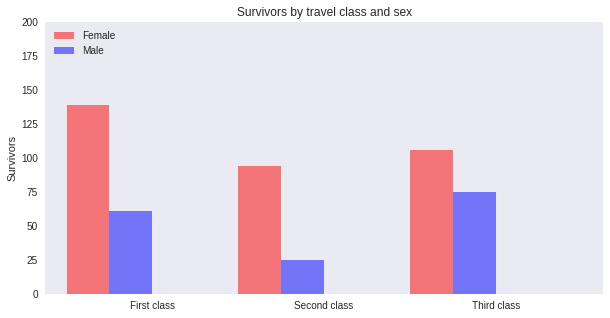

In [23]:
raw_data = {'pclass': ['First class', 'Second class', 'Third class'],
        'female': female,
        'male': male }
df = pd.DataFrame(raw_data, columns = ['pclass', 'female', 'male'])


pos = list(range(len(df['pclass']))) 
width = 0.25 

fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos, 
        df['female'], 
        width, 
        alpha=0.5, 
        color='red', 
        label=df['pclass'][0]) 

plt.bar([p + width for p in pos], 
        df['male'],
        width, 
        alpha=0.5, 
        color='blue', 
        label=df['pclass'][1]) 

ax.set_ylabel('Survivors')
ax.set_title('Survivors by travel class and sex')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(df['pclass'])
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['female'] + df['male'] )] )

plt.legend(['Female', 'Male'], loc='upper left')
plt.grid()
plt.show()

<br>
<h4> 6. Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index.</h4>
<br>

In [25]:
people_unknown_age = titanic_data.age.isnull().sum()
people_known_age = len(titanic_data) - people_unknown_age
print ("People with unknown age: ",people_unknown_age)
print ("People with known age: ", people_known_age)


age_categories_df = titanic_data.copy()
age_categories_df = age_categories_df.loc[~age_categories_df.age.isnull()].copy()

# sorted by age, rows with age=NaN removed
age_categories_df = age_categories_df.sort_values(by='age').copy()
age_categories_df = age_categories_df.reset_index(drop=True)

print ("Shape of sorted by age without NaN, reindexed: ", age_categories_df.shape)

# split into two groups, now when it is sorted

sorted_age_len = len(age_categories_df)
print("Length is ", sorted_age_len)
median_age = age_categories_df.loc[sorted_age_len//2].age
print("Median value for age: ", median_age)

people_first_group_count = age_categories_df.query("age < @median_age")
print ("First group count ", len(people_first_group_count))

people_second_group_count = age_categories_df.query("age > @median_age")
print ("Second group count ", len(people_second_group_count))


people_with_median_age = age_categories_df.query("age == @median_age")

print ("Number of people ", median_age, " years old is ", len(people_with_median_age))

median_age=age_categories_df.age.median()
print ("Or we could just use pandas function for calculating the median value")

splitter = len(age_categories_df)//2
print ("Splitter: ", splitter) 
category_col = pd.Series()
category_col  = [1]*splitter + [2]*splitter
age_categories_df['category'] = category_col


def calculate_survivors_by_age_category(age_categories_df, category, pclass, sex):
    survived_flag = 1
    all_passengers = len(age_categories_df.query("category == @category & pclass == @pclass & sex==@sex"))
    survived_passengers = len(age_categories_df.query("category == @category & pclass == @pclass & sex==@sex & survived==@survived_flag"))
    return (survived_passengers/all_passengers*100)
    
    
# calculate what is needed
df = pd.DataFrame(columns=['category', 'pclass', 'sex', 'survived_proportion'])

category = list(age_categories_df.category.unique())
pclass = list(age_categories_df.pclass.unique())
sex = list(age_categories_df.sex.unique())

for category_iter in category:
    for pclass_iter in pclass:
        for sex_iter in sex:
            value = calculate_survivors_by_age_category(age_categories_df, category_iter, pclass_iter, sex_iter)
            row = pd.Series([category_iter, pclass_iter, sex_iter, value], index = ['category', 'pclass', 'sex', 'survived_proportion'])
            df = df.append(row, ignore_index=True)



# present in one dataframe the result
df

People with unknown age:  263
People with known age:  1046
Shape of sorted by age without NaN, reindexed:  (1046, 14)
Length is  1046
Median value for age:  28.0
First group count  504
Second group count  510
Number of people  28.0  years old is  32
Or we could just use pandas function for calculating the median value
Splitter:  523


,category,pclass,sex,survived_proportion
0,1,3,female,51.851852
1,1,3,male,18.636364
2,1,2,female,90.566038
3,1,2,male,22.535211
4,1,1,female,95.121951
5,1,1,male,50.000000
6,2,3,female,36.363636
7,2,3,male,13.953488
8,2,2,female,88.000000
9,2,2,male,8.045977
